<a href="https://colab.research.google.com/github/yashyaks/ML-Playground/blob/main/TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Expt 1 - Detecting and Detrending trends in Time Series:

## 1. Detecting Trend Using a Hodrick-Prescott Filter

a ) On India_Exchange_Rate_Dataset.xls

In [ ]:
import pandas as pd
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter

In [ ]:
df = pd.read_excel(r'India_Exchange_Rate_Dataset.xls', index_col = 0 , parse_dates = True)
df.head


<bound method NDFrame.head of                    EXINUS
observation_date         
1973-01-01         8.0041
1973-02-01         7.7538
1973-03-01         7.5465
1973-04-01         7.5462
1973-05-01         7.4927
...                   ...
2019-07-01        68.7391
2019-08-01        71.1891
2019-09-01        71.3110
2019-10-01        71.0086
2019-11-01        71.4942

[563 rows x 1 columns]>

In [ ]:
EXINUS_cycle ,  EXINUS_trend = hpfilter(df['EXINUS'],lamb = 1600)

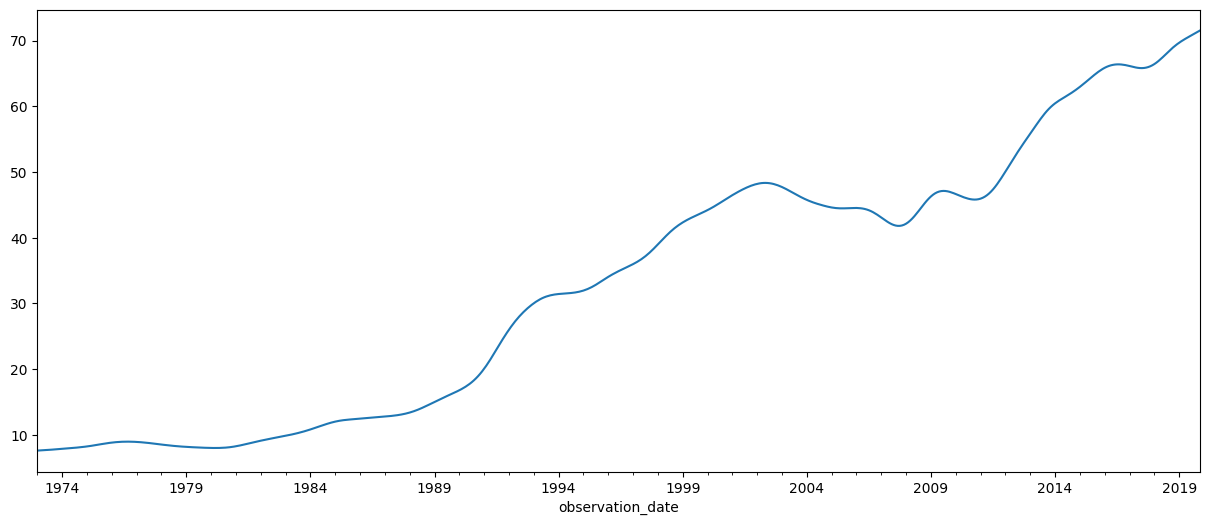

In [ ]:
EXINUS_trend.plot(figsize = (15,6)).autoscale(axis = 'x',tight = True)

Inference :  From the above plot we can understand that the general slope is upwards thereby suggesting a long-term appreciation with a small depreciation between the years 2000 and 2007.


b ) On shampoo.csv

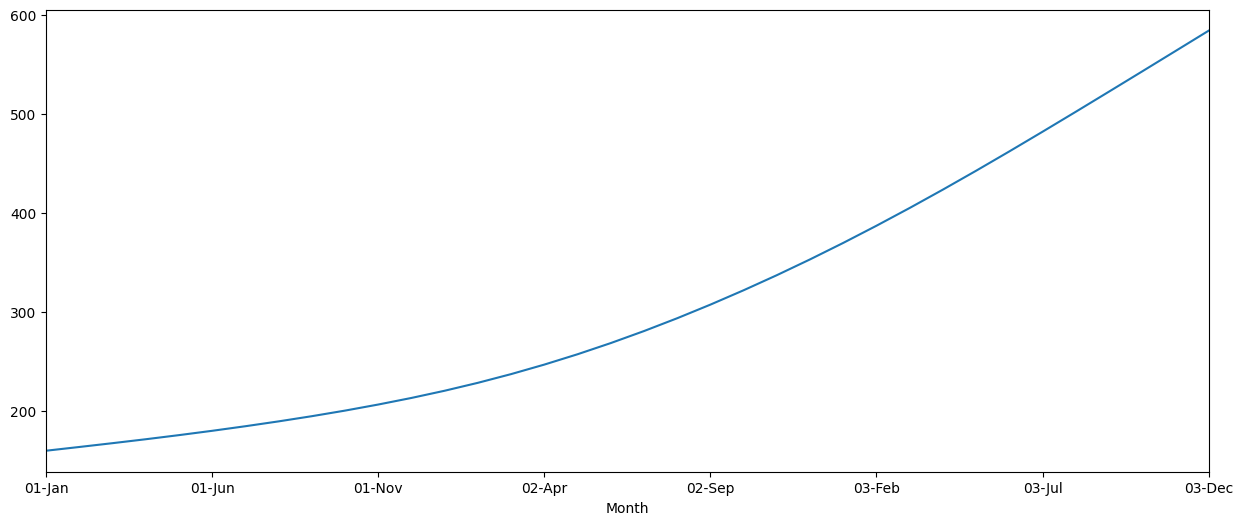

In [ ]:
import pandas as pd
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter
df= pd.read_csv(r'shampoo.csv', index_col=0,parse_dates=True)
Sales_cycle,Sales_trend= hpfilter(df['Sales'], lamb=1600)
Sales_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

Inference :  From the above plot we can understand that the general slope is upwards thereby suggesting a long-term appreciation from january to december.

##2. Detrending using Pandas Differencing

a ) On India_Exchange_Rate_Dataset.xls

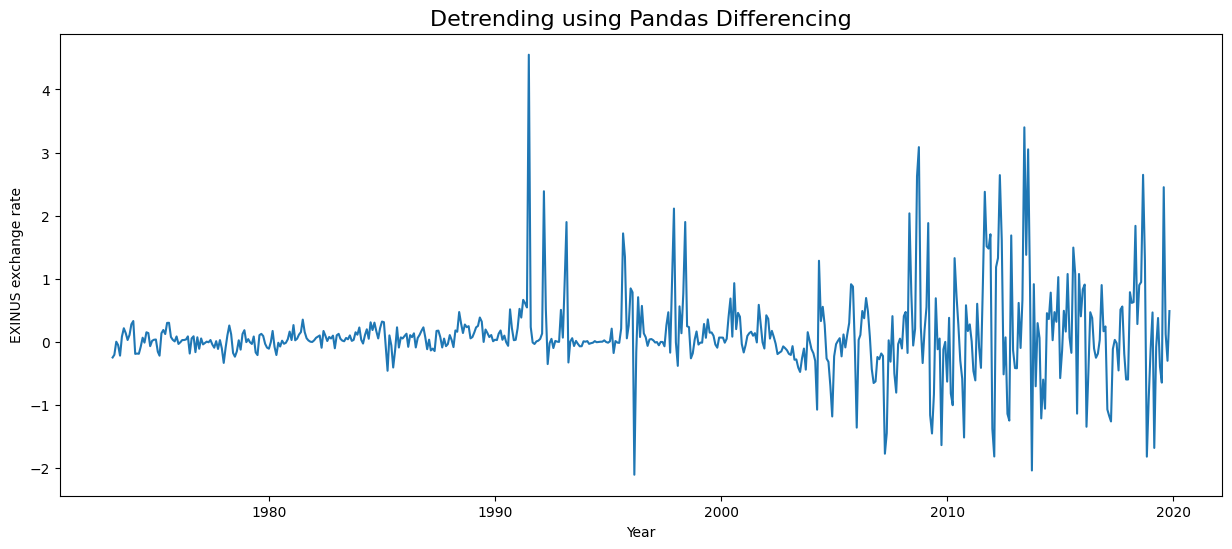

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_excel(r'India_Exchange_Rate_Dataset.xls',
index_col=0,parse_dates=True)
diff = df.EXINUS.diff()
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()


Inference :  We can observe that there is a lot of fluctuation in the above graph thus showing its volatility, increasingly from the year 2009 to 2020

b ) On shampoo.csv

In [ ]:
series= pd.read_csv(r'shampoo.csv', index_col=0,parse_dates=True)
series.head()

,Sales
Month,
01-Jan,266.0
01-Feb,145.9
01-Mar,183.1
01-Apr,119.3
01-May,180.3


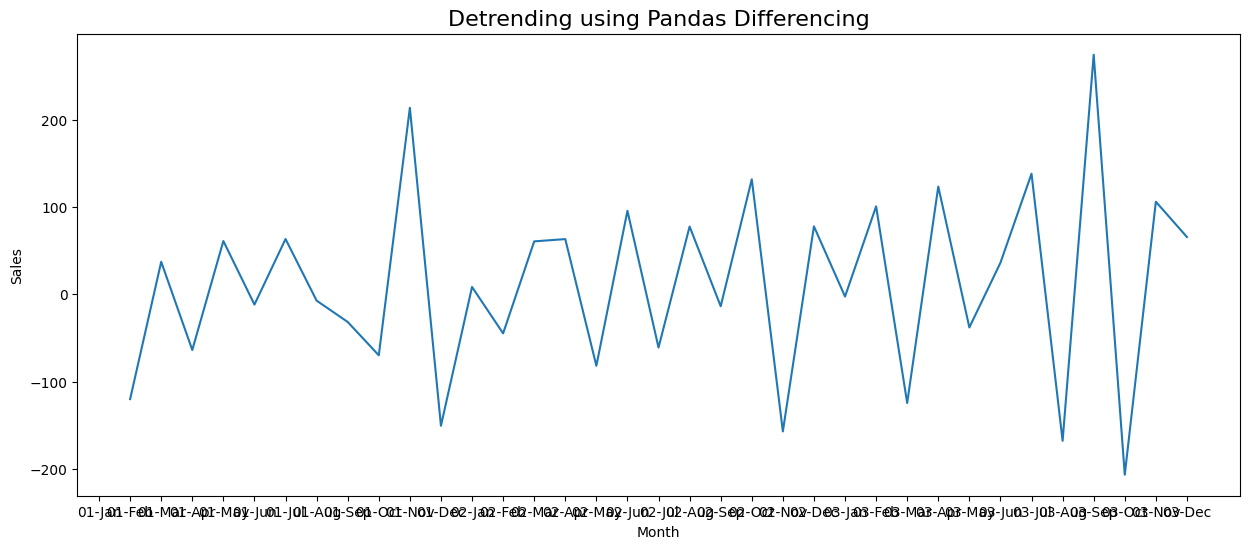

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_csv(r'shampoo.csv',
index_col=0,parse_dates=True)
diff = df.Sales.diff()
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


Inference :  From the above plot we can infer that there are little variations across the months especially during the month of august and september.

## 3. Detrending using SciPy signal

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import warnings

a ) On India_Exchange_Rate_Dataset.xls

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_excel(r'India_Exchange_Rate_Dataset.xls' , index_col = 0 , parse_dates = True)

In [ ]:
detrended= signal.detrend(df.EXINUS.values)

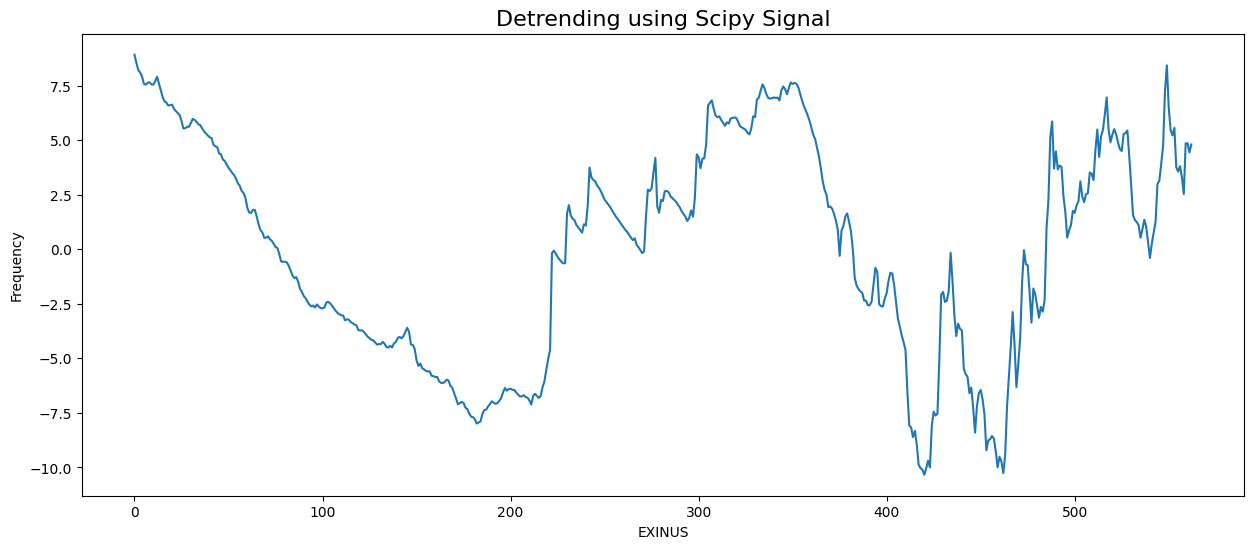

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel('EXINUS')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

Inference : We can see that before detrending there was a upward slope but after detrending there's a decreasing slope in the beginning then small variations.

b) On Shampoo.csv

In [ ]:
df = pd.read_csv(r'shampoo.csv' , index_col = 0 , parse_dates = True)
df.head(5)

,Sales
Month,
01-Jan,266.0
01-Feb,145.9
01-Mar,183.1
01-Apr,119.3
01-May,180.3


In [ ]:
detrended2= signal.detrend(df.Sales.values)

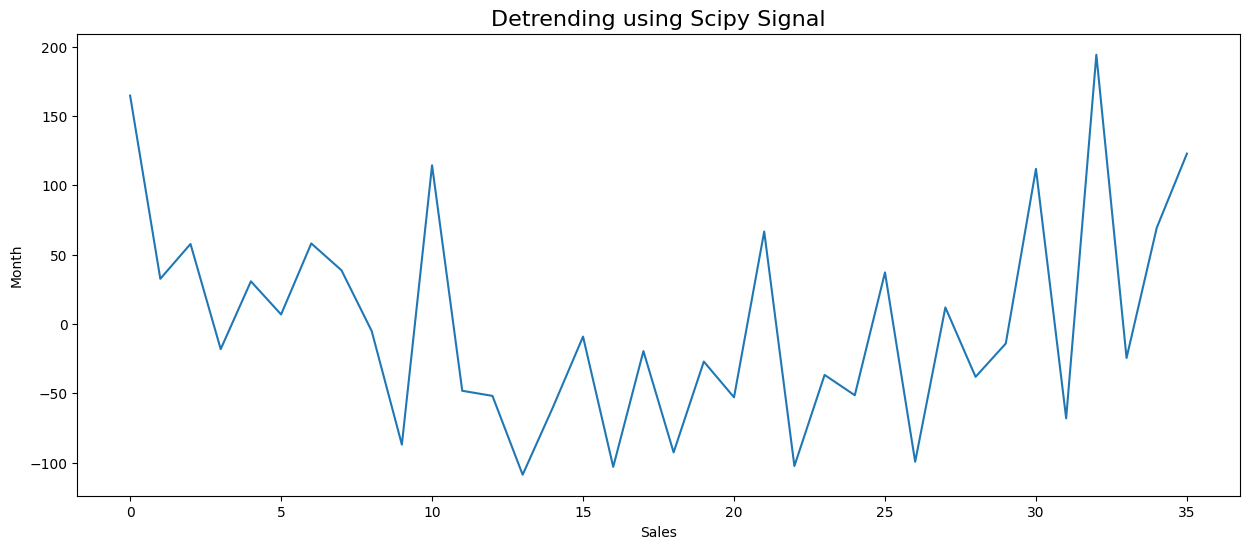

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(detrended2)
plt.xlabel('Sales')
plt.ylabel('Month')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

Inferences :  We can see that before detrending there was a upward slope but after detrending there's a parabolic trend followed on the shampoo.csv dataset.

## 4. Detrending using HP Filter

a ) On India_Exchange_Rate_Dataset.xls

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline

In [ ]:
df= pd.read_excel(r'India_Exchange_Rate_Dataset.xls',index_col=0,parse_dates=True)

In [ ]:
EXINUS_cycle,EXINUS_trend= hpfilter(df['EXINUS'], lamb=1600)
df['trend'] = EXINUS_trend
detrended= df.EXINUS -df['trend']

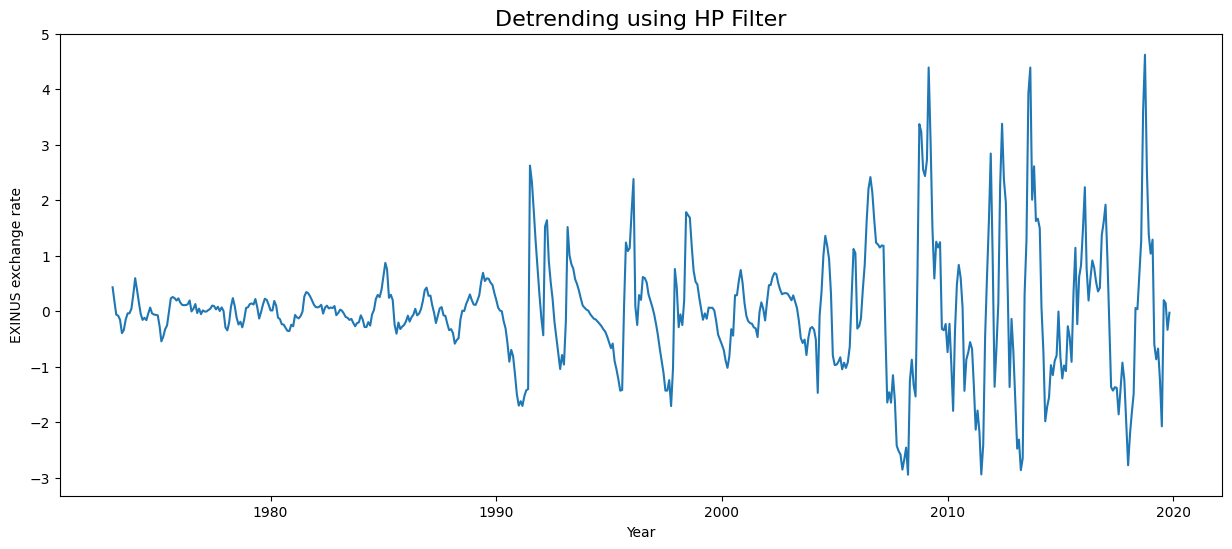

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

Inferences :  From the above plot we can infer that after detrending using HP filter we can obsereve that the fluctuations are more after the year 2000.

b) On shampoo.csv

In [ ]:
df= pd.read_csv(r'shampoo.csv',index_col=0,parse_dates=True)
df.head(5)

,Sales
Month,
01-Jan,266.0
01-Feb,145.9
01-Mar,183.1
01-Apr,119.3
01-May,180.3


In [ ]:
Sales_cycle,Sales_trend= hpfilter(df['Sales'], lamb=1600)
df['trend'] = Sales_trend
detrended= df.Sales -df['trend']

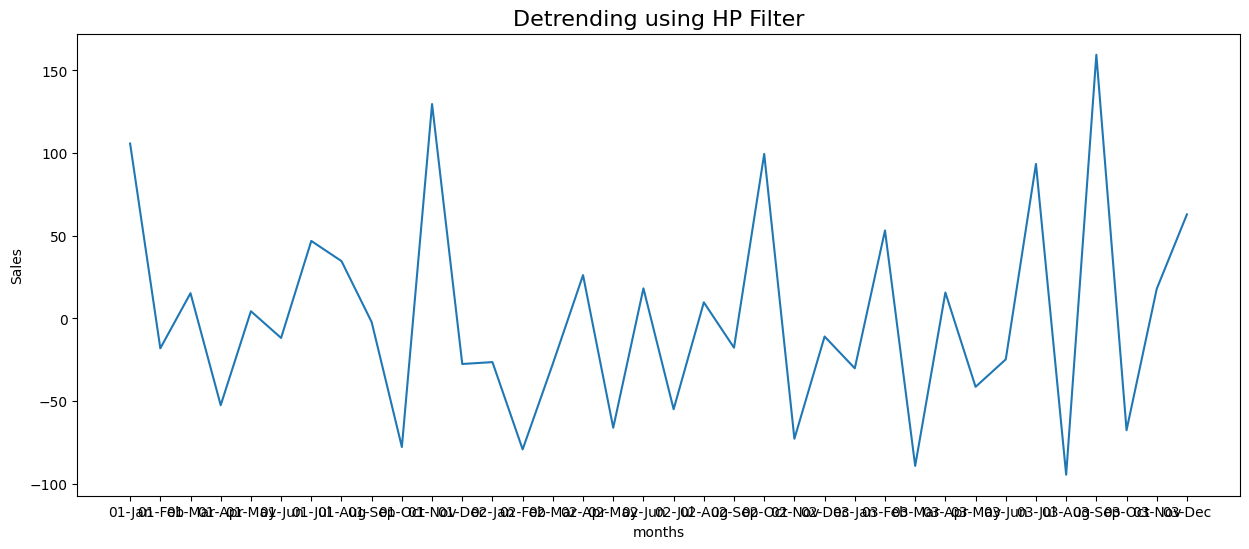

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('months')
plt.ylabel('Sales')
plt.show()

Inferences :  From the above plot we can infer that after detrending using HP filter we can obsereve that the fluctuations are throughout the year.

# Expt 2 - Seasonality


1. Multiple Box Plots
2. Autocorrelation Plot
3. Deseasoning of Time-Series Data
4. Seasonal Decomposition(Additive and Multiplicative)
  1. Trend
  2. Seasonal Index
  3. Residual
5. Detecting Cyclic Variations

 ### Implement seasonality decomposition on the mentioned dataset (using additive and multiplicative decomposition)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

link = f'https://drive.google.com/uc?id=10Fx6WmzPGfv28PuRJylgN-PksFEDzBA8'
df_ind_ex_rate = pd.read_excel(link)

In [5]:
df_ind_ex_rate

,observation_date,EXINUS
0,1973-01-01,8.0041
1,1973-02-01,7.7538
2,1973-03-01,7.5465
3,1973-04-01,7.5462
4,1973-05-01,7.4927
...,...,...
558,2019-07-01,68.7391
559,2019-08-01,71.1891
560,2019-09-01,71.3110
561,2019-10-01,71.0086


Detecting Seasonality using Multiple Box Plots:

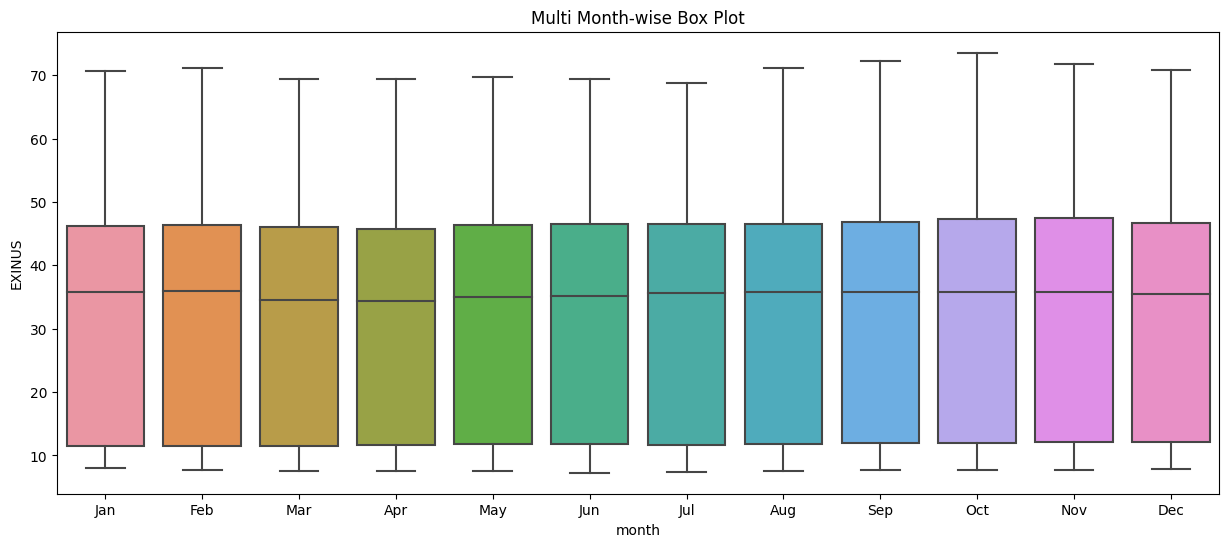

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

df_ind_ex_rate['month'] = df_ind_ex_rate['observation_date'].dt.strftime('%b')
df_ind_ex_rate['year'] = [d.year for d in df_ind_ex_rate.observation_date]
df_ind_ex_rate['month'] = [d.strftime('%b') for d in df_ind_ex_rate.observation_date]
years = df_ind_ex_rate['year'].unique()
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='EXINUS', data=df_ind_ex_rate).set_title("Multi Month-wise Box Plot")
plt.show()

Detecting Seasonality using Autocorrelation Plot:

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

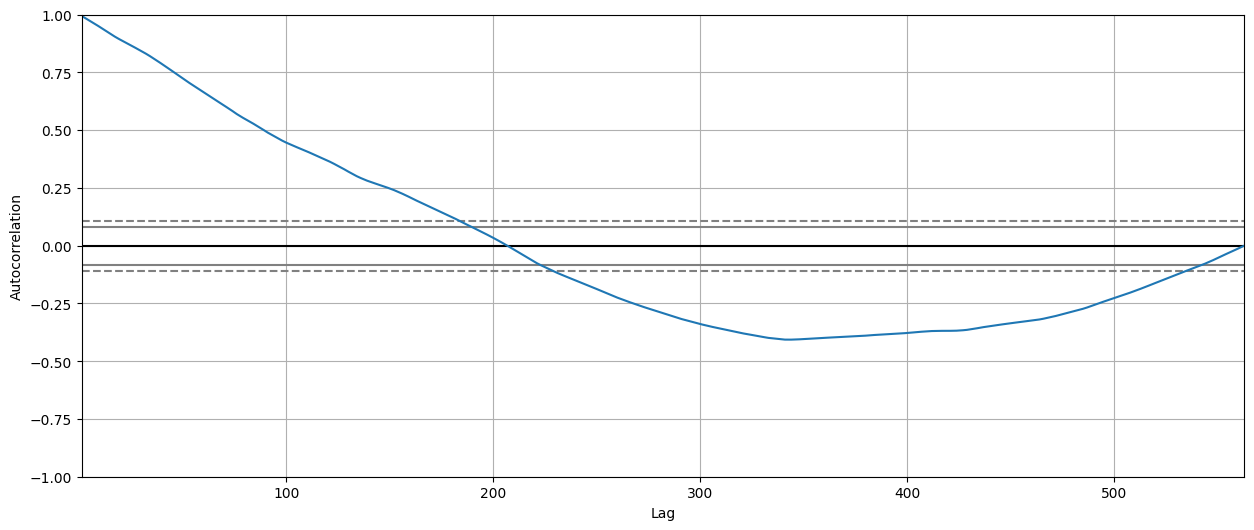

In [7]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'figure.figsize':(15,6)})
autocorrelation_plot(df_ind_ex_rate.EXINUS.tolist())

Deseasoning of Time-Series Data: Seasonal Decomposition

seasonality  decomposition (multiplicative decomposition)

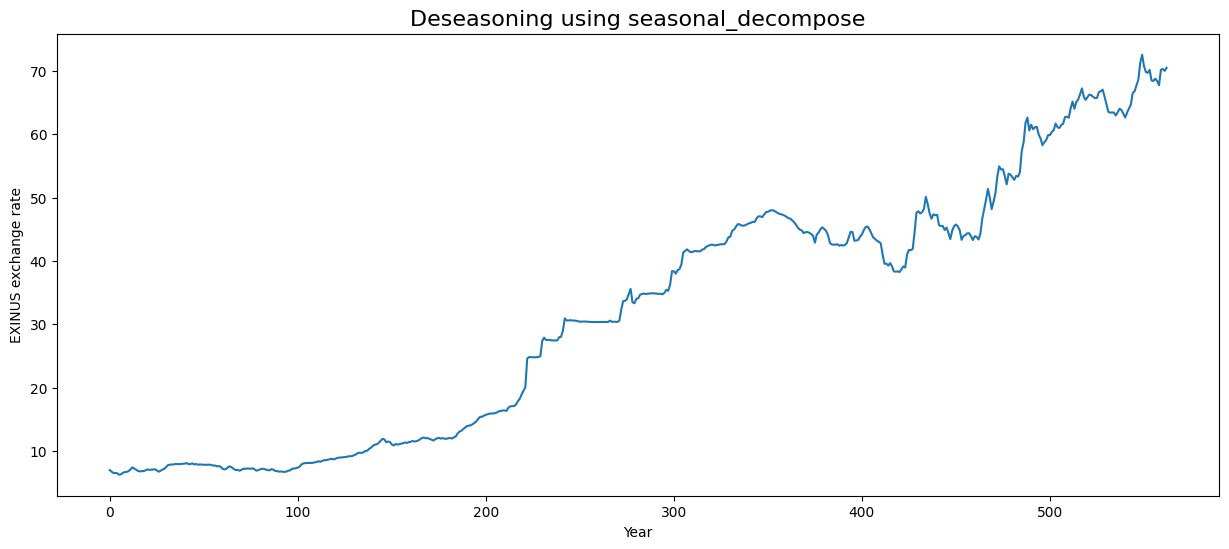

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

result_mul = seasonal_decompose(df_ind_ex_rate['EXINUS'], model='multiplicative', period=12)
deseason = df_ind_ex_rate['EXINUS'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

seasonality  decomposition (additive decomposition)

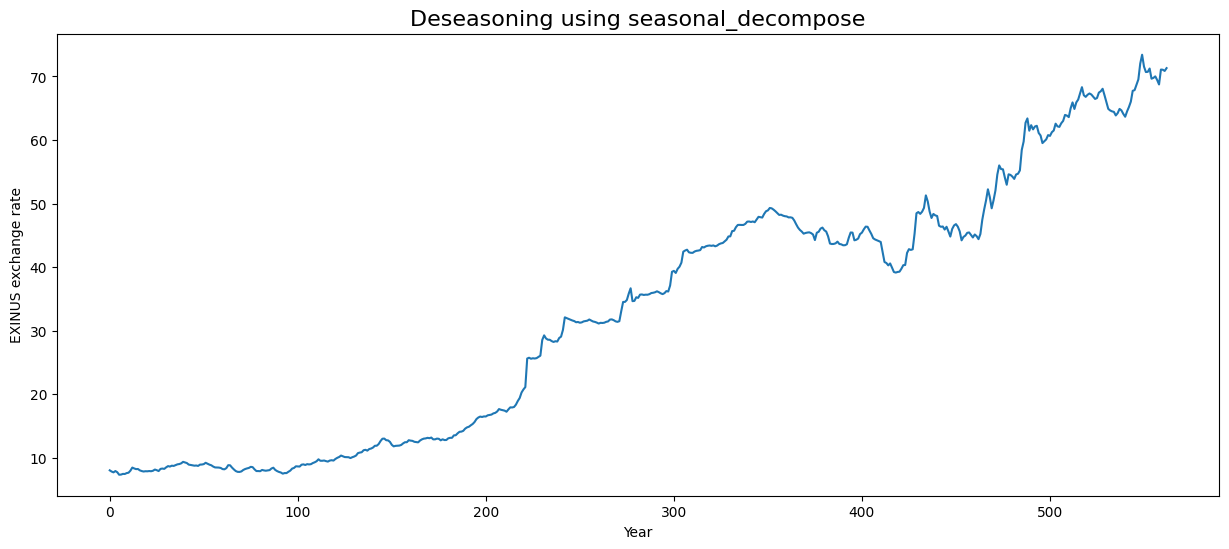

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

result_mul = seasonal_decompose(df_ind_ex_rate['EXINUS'], model='additive', period=12)
deseason = df_ind_ex_rate['EXINUS'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

Detecting Cyclic Variations:

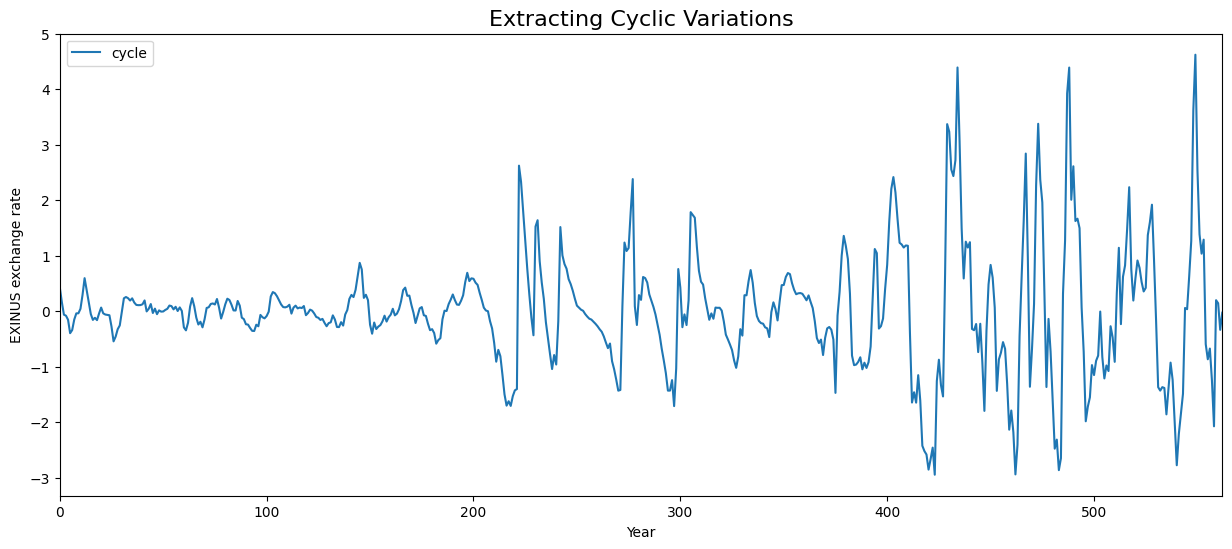

In [10]:
EXINUS_cycle,EXINUS_trend = hpfilter(df_ind_ex_rate['EXINUS'], lamb=1600)
df_ind_ex_rate['cycle'] =EXINUS_cycle
df_ind_ex_rate['trend'] =EXINUS_trend
df_ind_ex_rate[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

## Dataset 1: Facebook Stock Market Performance

In [11]:
import pandas as pd

link = f'https://drive.google.com/uc?id=1N4lZbgxSJOHBGF99V2NwxKjKmihPnXHL'
fb = pd.read_csv(link)

In [12]:
fb

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600
...,...,...,...,...,...,...,...
1254,2019-12-02,202.130005,202.179993,198.050003,199.699997,199.699997,11503400
1255,2019-12-03,197.600006,198.929993,195.080002,198.820007,198.820007,11595300
1256,2019-12-04,200.000000,200.029999,198.050003,198.710007,198.710007,8456300
1257,2019-12-05,199.860001,201.289993,198.210007,199.360001,199.360001,9740400


Detecting Seasonality using Multiple Box Plots:

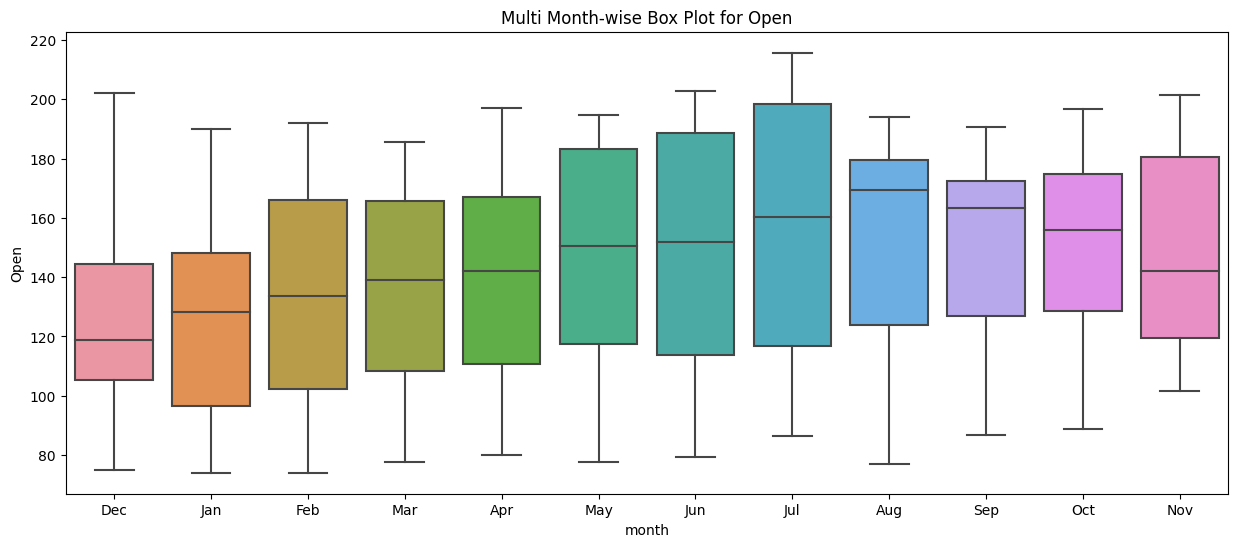

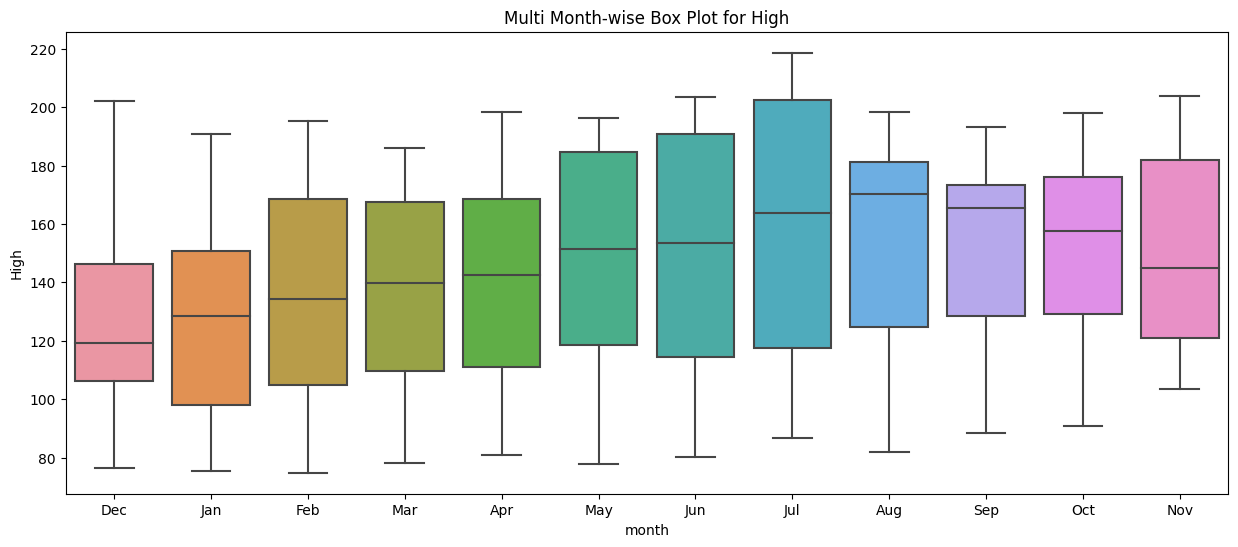

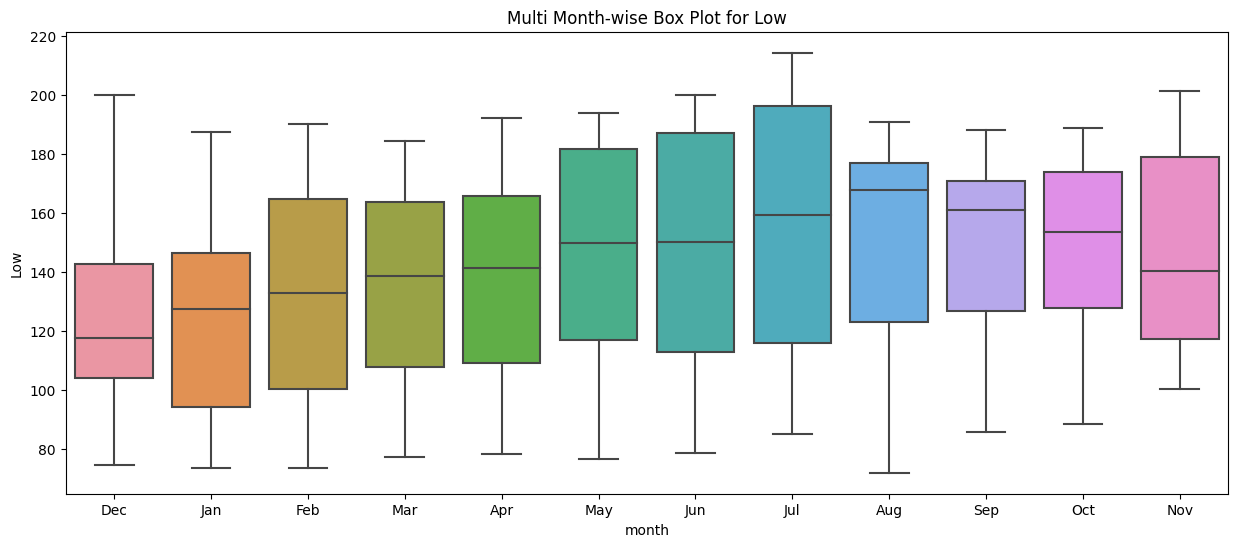

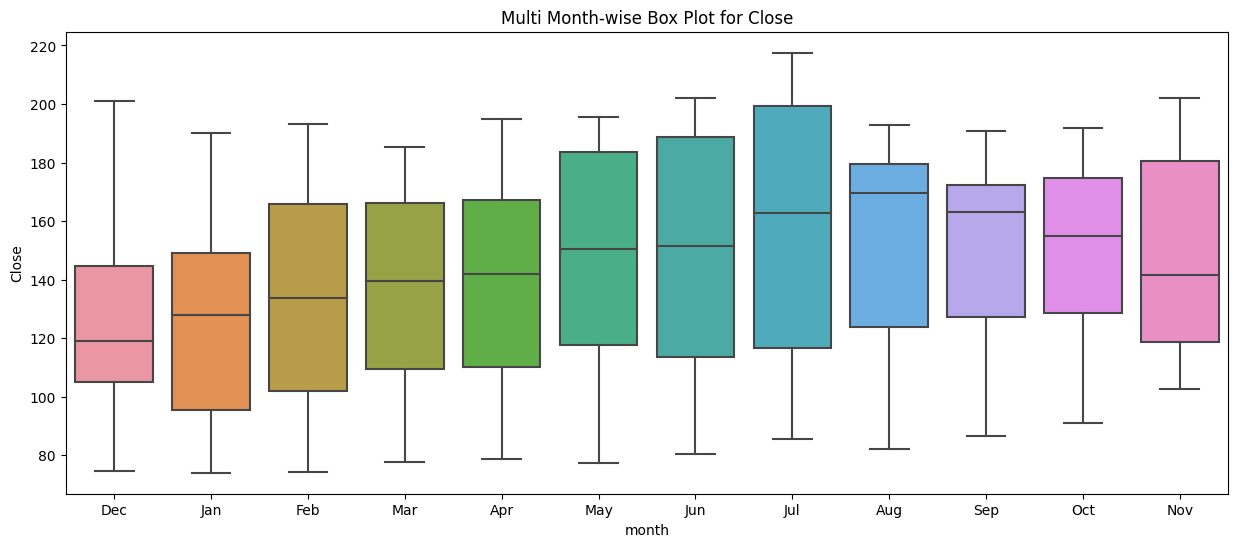

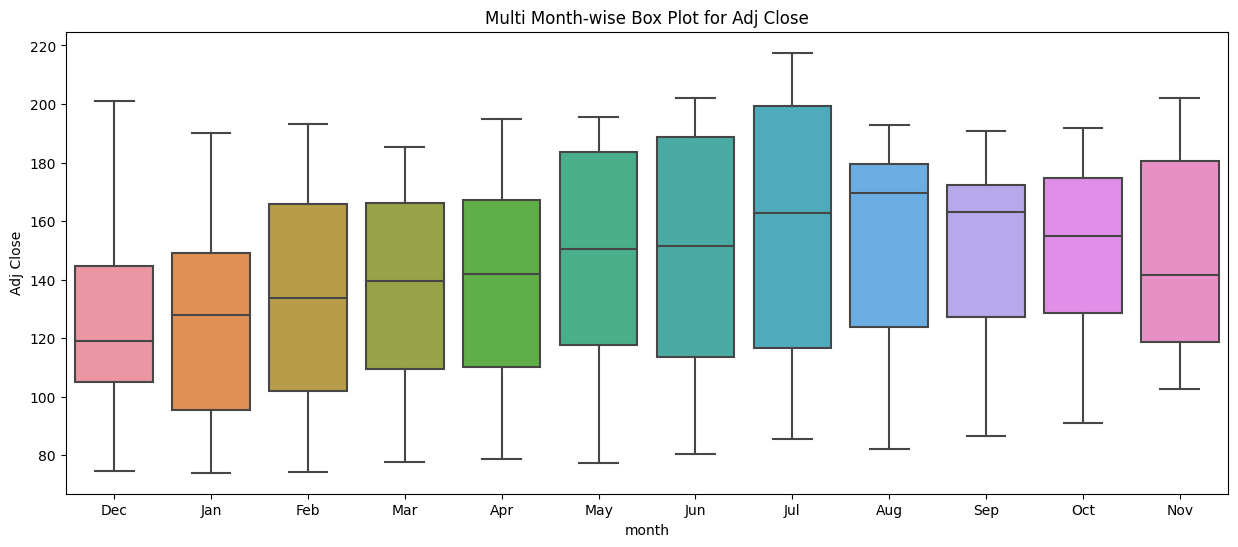

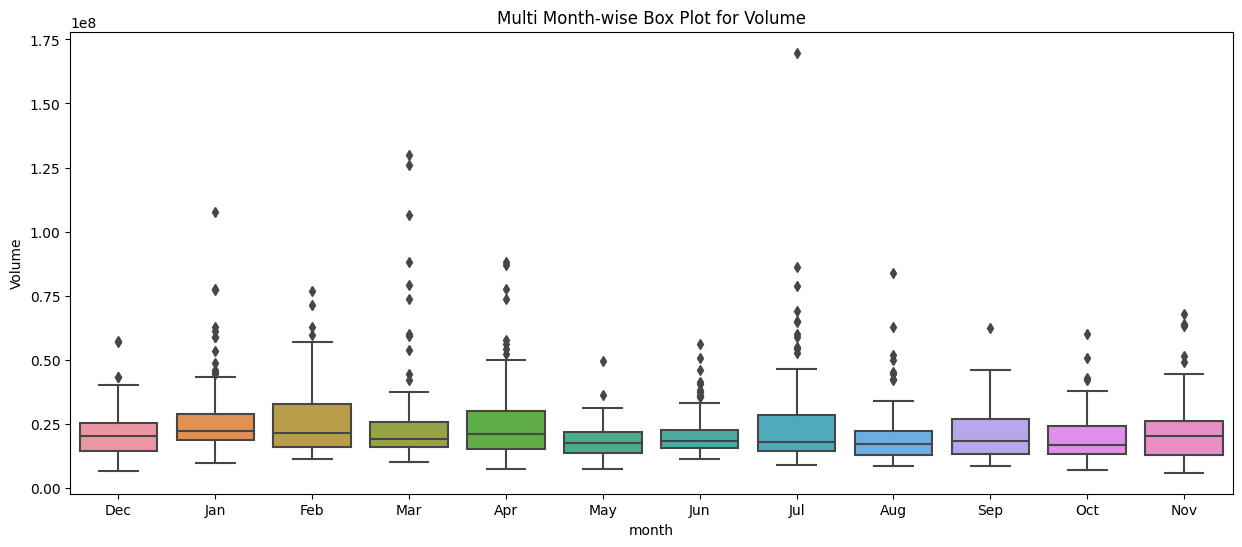

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter

%matplotlib inline
fb['Date'] = pd.to_datetime(fb['Date'])

fb['month'] = fb['Date'].dt.strftime('%b')
fb['year'] = [d.year for d in fb.Date]
fb['month'] = [d.strftime('%b') for d in fb.Date]
years = fb['year'].unique()
plt.figure(figsize=(15,6))

y = ['Open','High','Low','Close','Adj Close','Volume']
for i in y:
  sns.boxplot(x='month', y=i, data=fb).set_title("Multi Month-wise Box Plot for "+ i)
  plt.show()

Detecting Seasonality using Autocorrelation Plot:


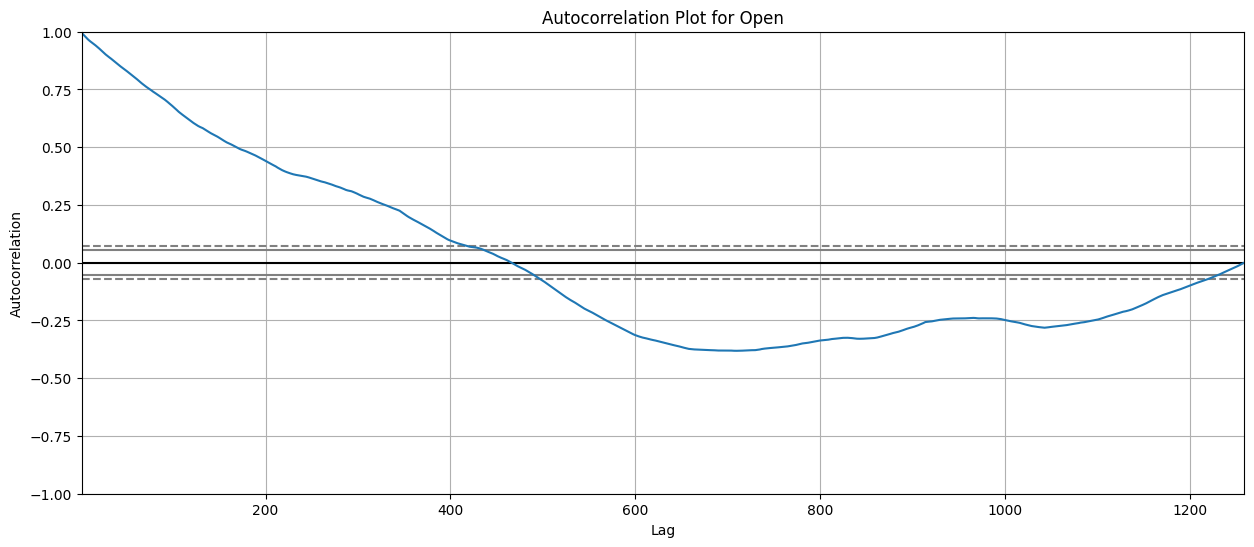

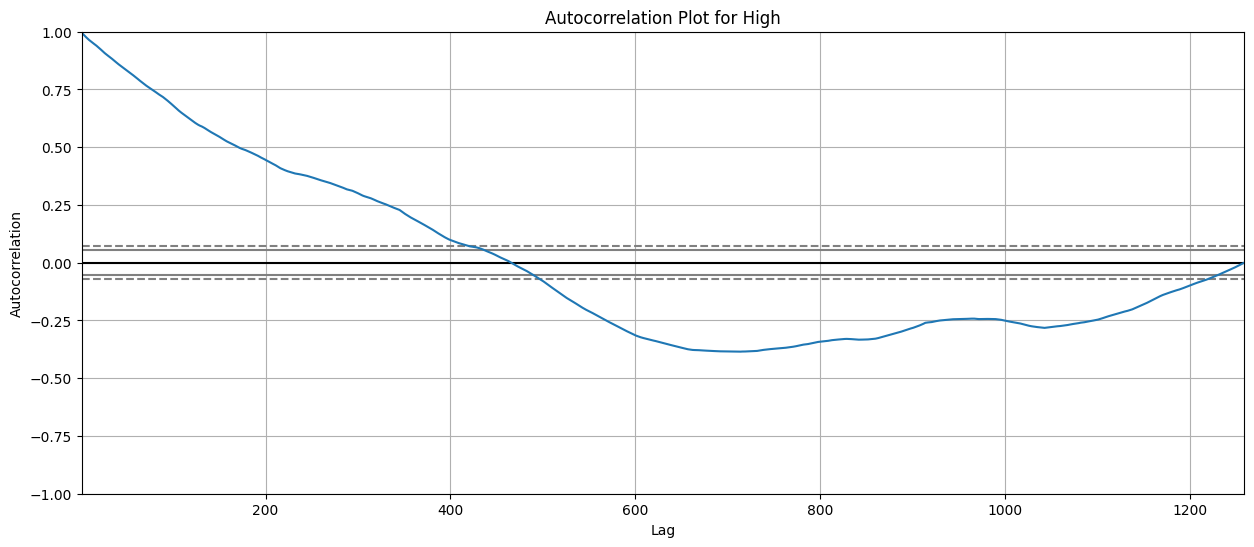

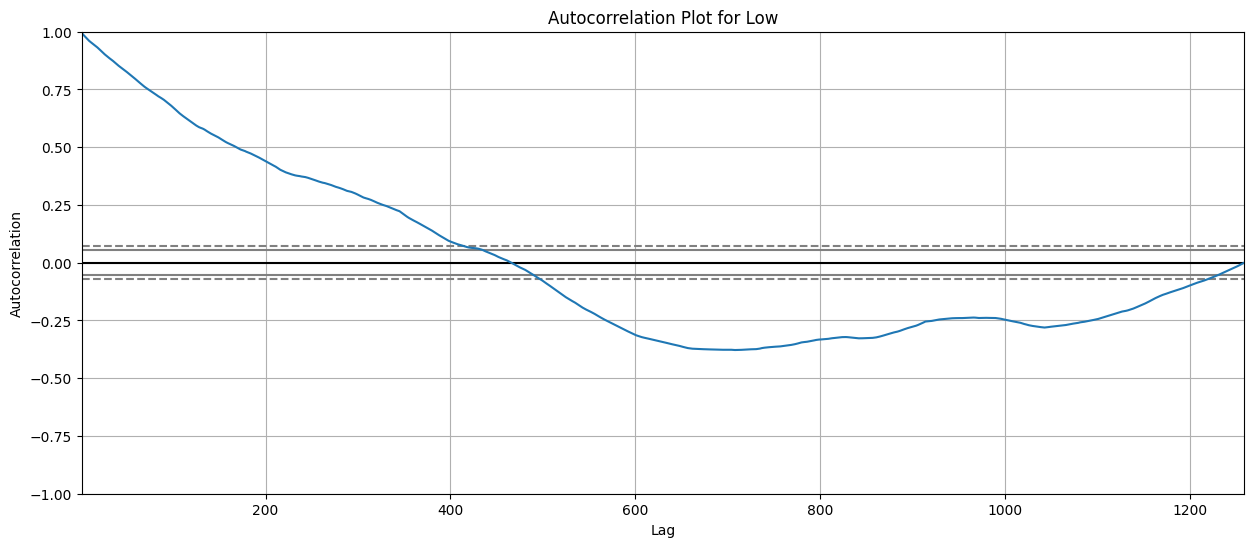

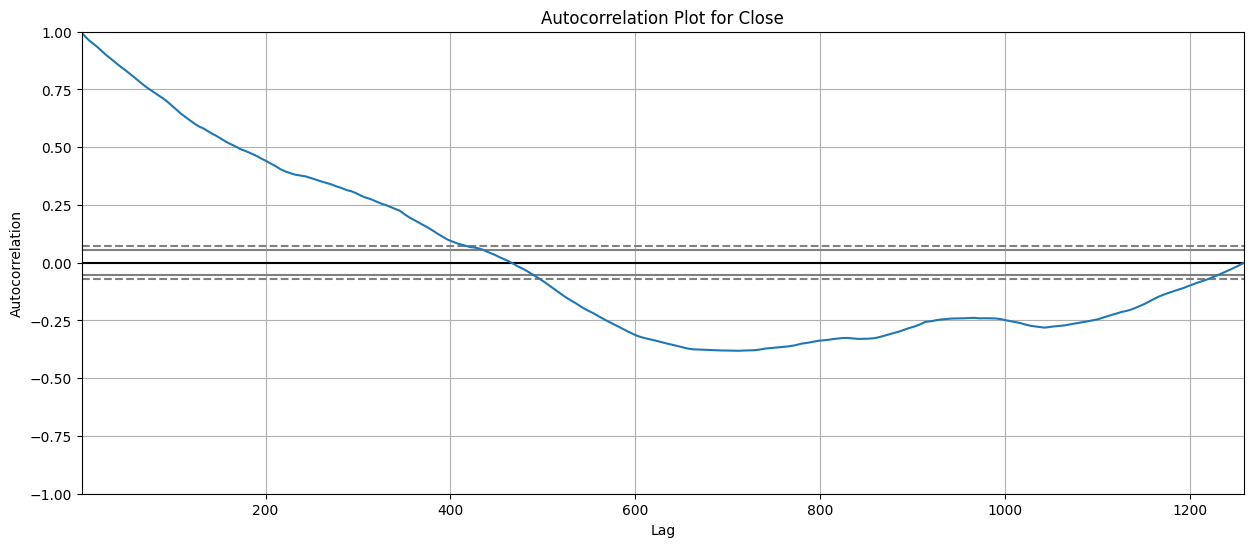

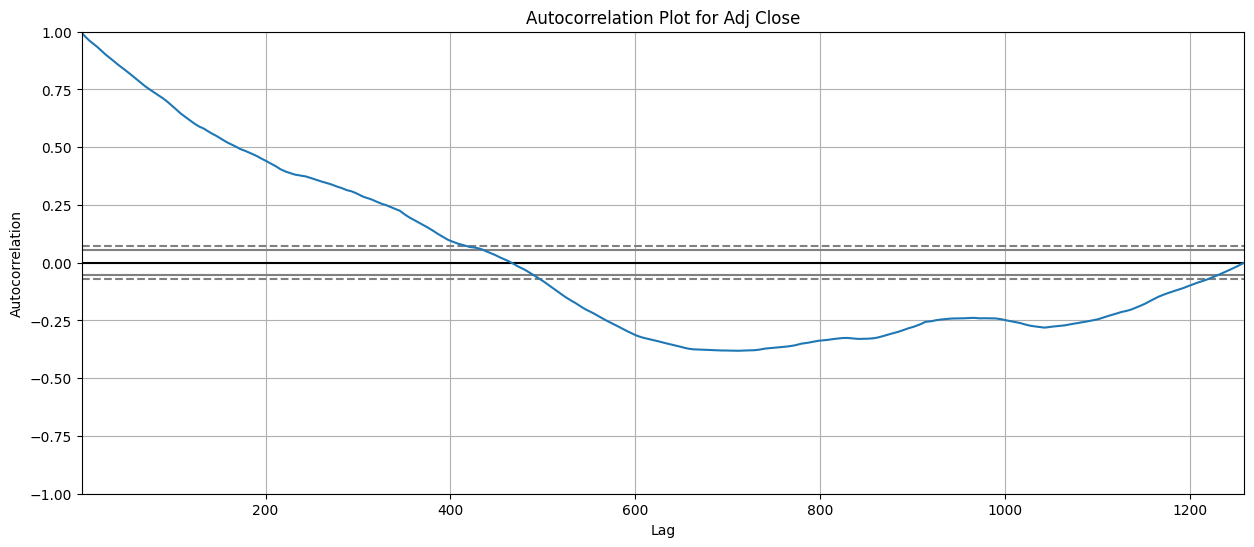

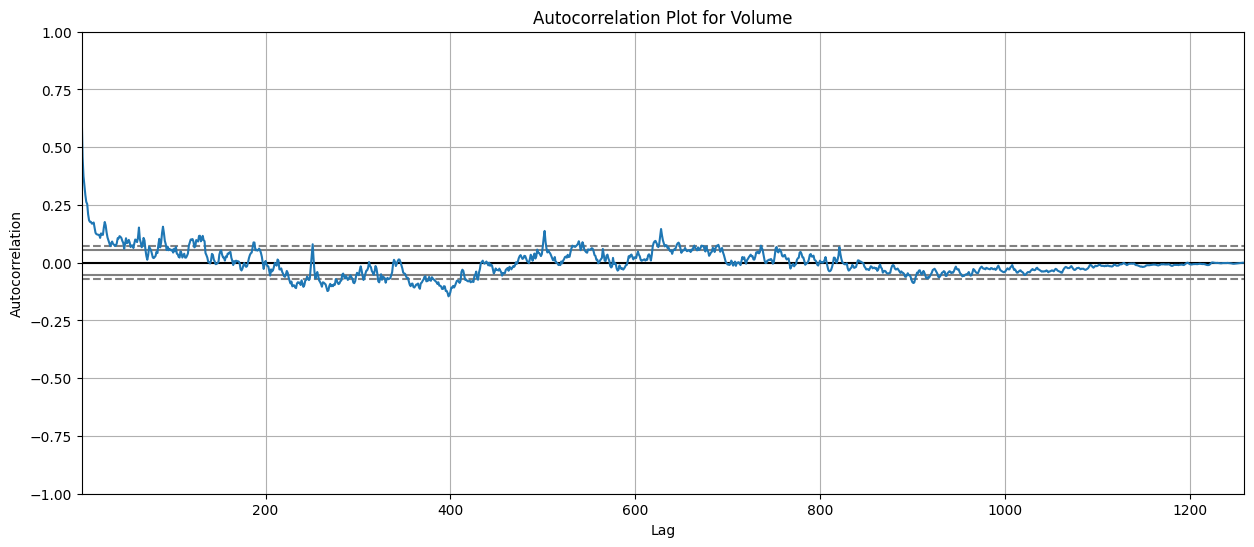

In [14]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
y = ['Open','High','Low','Close','Adj Close','Volume']
plt.rcParams.update({'figure.figsize':(15,6)})

for col in y:
    autocorrelation_plot(fb[col])
    plt.title(f'Autocorrelation Plot for {col}')
    plt.show()

Create decomposition models from scratch

Implement seasonality decomposition using the seasonal_decompose() method.

In [19]:
fb.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'month',
       'year'],
      dtype='object')

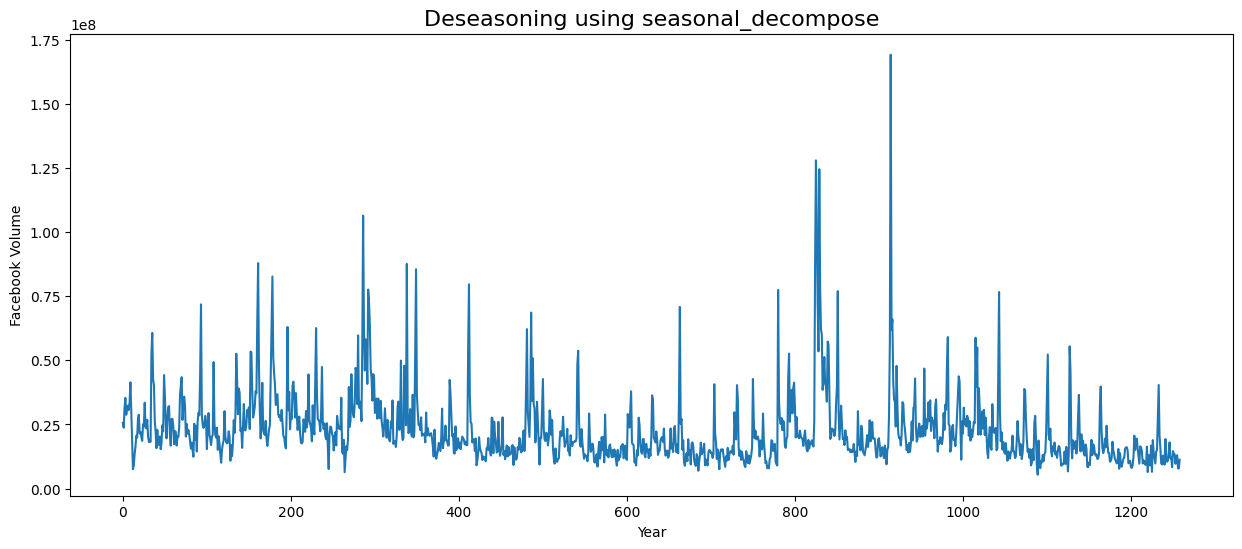

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

result_mul = seasonal_decompose(fb['Volume'], model='additive', period=12)
deseason = fb['Volume'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Facebook Volume')
plt.show()

In [29]:
def seasonal_decompose(df, column, period=12):
    df['Trend'] = df[column].rolling(window=period, center=True).mean()
    df['Seasonal'] = df[column] - df['Trend']
    df['Residual'] = df[column] - df['Trend'] - df['Seasonal']
    return df

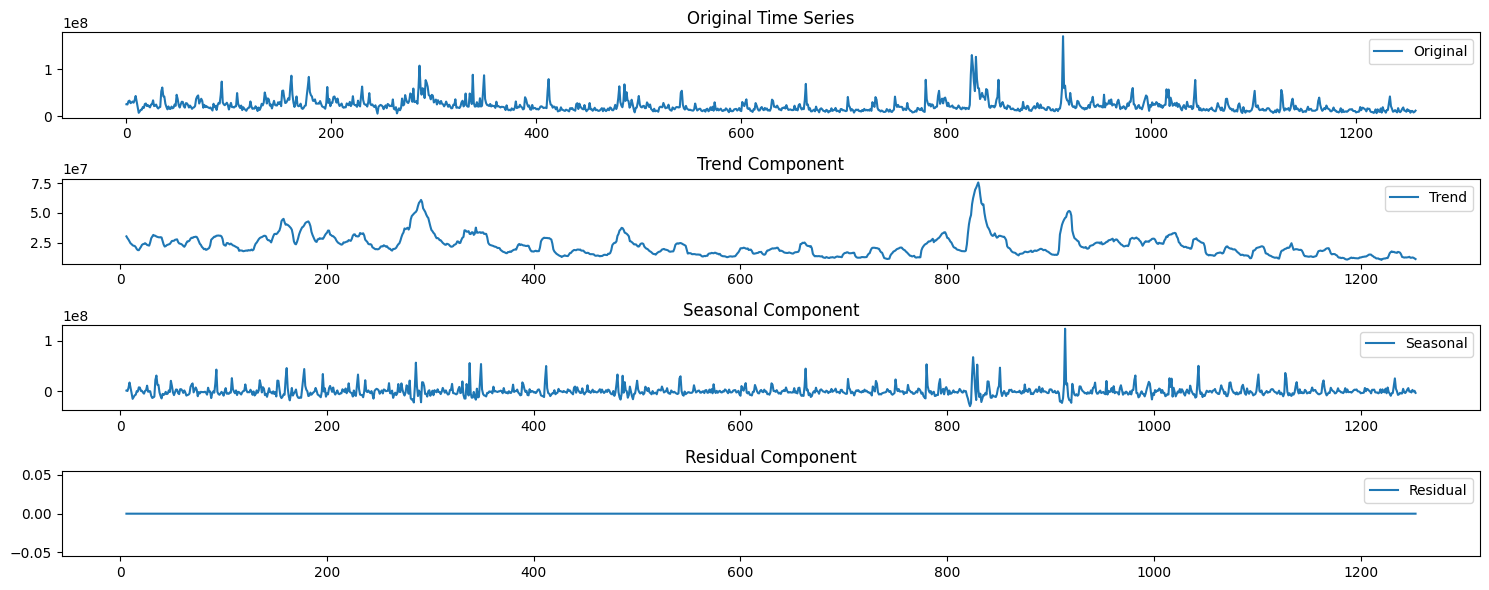

In [30]:
result = seasonal_decompose(fb, 'Volume')

plt.figure(figsize=(15, 6))
plt.subplot(411)
plt.plot(result['Volume'], label='Original')
plt.title('Original Time Series')
plt.legend()

plt.subplot(412)
plt.plot(result['Trend'], label='Trend')
plt.title('Trend Component')
plt.legend()

plt.subplot(413)
plt.plot(result['Seasonal'], label='Seasonal')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(414)
plt.plot(result['Residual'], label='Residual')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()